#Connect pyspark to snowflake

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
# install spark (change the version number if needed)


# unzip the spark file to the current folder


# set your spark folder to your system path environment. 
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
# install findspark using pip
!pip install -q findspark
!pip install pyspark==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204.7 MB 25 kB/s 
     |████████████████████████████████| 198 kB 51.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=56412bf444477b4317a57a3438de8c00382cabc5ca1838fc9bda40e9f92ddc9e
  Stored in directory: /root/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [ ]:
!wget https://repo1.maven.org/maven2/net/snowflake/snowflake-jdbc/3.13.19/snowflake-jdbc-3.13.19.jar

--2022-07-12 08:00:22--  https://repo1.maven.org/maven2/net/snowflake/snowflake-jdbc/3.13.19/snowflake-jdbc-3.13.19.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30420144 (29M) [application/java-archive]
Saving to: ‘snowflake-jdbc-3.13.19.jar’

snowflake-jdbc-3.13 100%[===================>]  29.01M  --.-KB/s    in 0.1s    

2022-07-12 08:00:22 (240 MB/s) - ‘snowflake-jdbc-3.13.19.jar’ saved [30420144/30420144]



In [ ]:
!wget https://repo1.maven.org/maven2/net/snowflake/spark-snowflake_2.12/2.9.3-spark_3.0/spark-snowflake_2.12-2.9.3-spark_3.0.jar

--2022-07-12 08:00:22--  https://repo1.maven.org/maven2/net/snowflake/spark-snowflake_2.12/2.9.3-spark_3.0/spark-snowflake_2.12-2.9.3-spark_3.0.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729642 (713K) [application/java-archive]
Saving to: ‘spark-snowflake_2.12-2.9.3-spark_3.0.jar’

spark-snowflake_2.1 100%[===================>] 712.54K  --.-KB/s    in 0.03s   

2022-07-12 08:00:22 (20.2 MB/s) - ‘spark-snowflake_2.12-2.9.3-spark_3.0.jar’ saved [729642/729642]



In [ ]:
import findspark
from pyspark.sql import SparkSession
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier,NaiveBayes,LogisticRegression
import pandas as pd
from pyspark.ml import Pipeline 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator
from pyspark.sql.types import IntegerType,BooleanType,DateType
from pyspark.ml.feature import MinMaxScaler, StringIndexer
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType, IntegerType, DateType
from keras.layers.core import Dense, Activation, Dropout
from pyspark.sql.functions import dayofweek

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
findspark.init()

In [ ]:
spark = SparkSession.builder \
    .master("local") \
    .appName("snowflake-test") \
    .config('spark.jars', '/content/snowflake-jdbc-3.13.19.jar,/content/spark-snowflake_2.12-2.9.3-spark_3.0.jar') \
    .getOrCreate()

In [ ]:
sfOptions = {
  "sfURL" : "zq08650.ap-southeast-1.snowflakecomputing.com",
  "sfUser" : "bigdata",
  "sfPassword" : "Bigdata1",
  "sfDatabase" : "BIGDATA",
  "sfSchema" : "PUBLIC",
  "sfWarehouse" : "COMPUTE_WH"
}

SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

In [ ]:
df = spark.read.format(SNOWFLAKE_SOURCE_NAME) \
  .options(**sfOptions) \
  .option("query",  'SELECT * FROM air_polution order by RECORD_DATE asc') \
  .load()

In [ ]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[RECORD_DATE: timestamp, CO: double, NO: double, NO2: double, O3: double, SO2: double, PM2_5: double, PM10: double, NH3: double, AIR_QUALITY: decimal(38,0)]>

In [ ]:
df.show()

+--------------------+-------+------+------+------+-----+------+------+-----+-----------+
|         RECORD_DATE|     CO|    NO|   NO2|    O3|  SO2| PM2_5|  PM10|  NH3|AIR_QUALITY|
+--------------------+-------+------+------+------+-----+------+------+-----+-----------+
|2020-11-25 01:00:...|1922.61| 51.86| 22.96|  1.61|53.88| 66.82| 88.41|14.69|          5|
|2020-11-25 02:00:...|2243.04| 62.59| 34.27|  4.87|73.43| 72.41| 96.33|18.75|          5|
|2020-11-25 03:00:...|2296.45|  59.9| 56.21| 13.41|94.41| 78.21|104.83|23.31|          5|
|2020-11-25 04:00:...|1188.28| 22.13| 55.52| 65.09|82.02| 47.59| 62.52|13.05|          4|
|2020-11-25 05:00:...|1001.36| 10.51| 52.09|123.02|82.02| 56.25| 70.02| 11.4|          5|
|2020-11-25 06:00:...|  907.9|  5.92| 43.53|167.37|77.25|  63.6| 77.39| 9.88|          5|
|2020-11-25 07:00:...| 761.03|  1.98| 41.81|134.47|61.99|  42.6| 54.24| 8.36|          4|
|2020-11-25 08:00:...| 774.38|  2.12| 48.67| 92.98|61.04| 30.08| 40.95| 8.87|          4|
|2020-11-2

#Data transform

In [ ]:
df_trans=df.withColumn("RECORD_DATE",df.RECORD_DATE.cast('date'))
df_trans_avg=df_trans.groupBy("RECORD_DATE").avg()
#df_trans_dow=df_trans_avg.withColumn("day_of_week",dayofweek(df_trans_avg.RECORD_DATE))
trainDF = df_trans_avg[df_trans_avg.RECORD_DATE < "2022-3-1"] 
testDF = df_trans_avg[df_trans_avg.RECORD_DATE >= "2022-3-1"]
#trainDF=trainDF.select('RECORD_DATE','day_of_week','avg(CO)', 'avg(NO)', 'avg(NO2)', 'avg(O3)','avg(SO2)', 'avg(PM2_5)','avg(PM10)','avg(NH3)','avg(AIR_QUALITY)')
#testDF=testDF.select('RECORD_DATE','day_of_week','avg(CO)', 'avg(NO)', 'avg(NO2)', 'avg(O3)','avg(SO2)', 'avg(PM2_5)','avg(PM10)','avg(NH3)','avg(AIR_QUALITY)')
trainArray = np.array(trainDF.select('RECORD_DATE','avg(CO)', 'avg(NO)', 'avg(NO2)', 'avg(O3)','avg(SO2)', 'avg(PM2_5)','avg(PM10)','avg(NH3)','avg(AIR_QUALITY)').collect())
testArray = np.array(testDF.select('RECORD_DATE','avg(CO)', 'avg(NO)', 'avg(NO2)', 'avg(O3)','avg(SO2)', 'avg(PM2_5)','avg(PM10)','avg(NH3)','avg(AIR_QUALITY)').collect())

In [ ]:
trainDF.show()

+-----------+--------------+------------+------------+------------+------------+-------------+-------------+------------+----------------+
|RECORD_DATE|       avg(CO)|     avg(NO)|    avg(NO2)|     avg(O3)|    avg(SO2)|   avg(PM2_5)|    avg(PM10)|    avg(NH3)|avg(AIR_QUALITY)|
+-----------+--------------+------------+------------+------------+------------+-------------+-------------+------------+----------------+
| 2020-11-25|2942.251304348|45.997826087|56.147391304|30.653043478|61.325652174|111.039130435|144.696086957|16.632608696|        4.826087|
| 2020-11-26|2786.834583333|    40.34625|66.802916667|    18.81625|62.038333333|      119.325|153.500416667|18.692916667|        4.750000|
| 2020-11-27|4193.186666667|      69.765|76.099166667|19.920416667|80.913333333|        166.9|209.419166667|30.030416667|        4.583333|
| 2020-11-28|      1267.275|12.223333333|49.239583333|23.150833333|    44.19125|     48.55125| 57.740833333| 8.580833333|        3.916667|
| 2020-11-29|1092.593333333

#Arima

##Data transform

In [ ]:
trainArray_modified=trainArray[:,-1].astype("float")
testArray_modified=testArray[:,-1].astype("float")
testArray_modified

array([3.3333, 4.5   , 4.625 , 4.5   , 4.9583, 4.4583, 1.9583, 2.8333,
       3.9583, 3.1667, 3.6667, 4.625 , 5.    , 2.0833, 3.875 , 3.5833,
       3.5833, 3.0833, 3.8333, 4.5417, 3.8333, 4.1667, 4.8333, 5.    ,
       4.0417, 3.3333, 4.375 , 4.    , 4.1667, 4.2917, 4.6667, 5.    ,
       4.125 , 2.75  , 3.7083, 3.625 , 4.5   , 4.25  , 5.    , 3.875 ,
       4.8333, 4.5417, 3.0833, 2.875 , 1.7083, 2.125 , 3.5417, 4.7083,
       4.6667, 3.4167, 4.25  , 4.5833, 3.75  , 3.5833, 4.4167, 4.6667,
       4.8333, 2.6667, 2.2917, 2.    , 2.7083, 4.625 , 1.875 , 3.125 ,
       3.375 , 4.125 , 4.6667, 3.375 , 3.2917, 4.2083, 4.6667, 3.7083,
       3.    , 3.9167, 4.7083, 4.5833, 2.1667, 5.    , 4.125 , 4.625 ,
       3.5833, 3.8333, 4.9583, 4.5   , 3.8333, 4.6667, 4.7917, 5.    ,
       4.2083, 4.5417, 4.9583, 4.8333, 4.7917, 4.9167, 2.3333, 4.25  ,
       3.9583, 2.5   , 2.0417, 4.5417, 4.5   , 3.9583, 4.5833, 4.125 ,
       4.    , 4.    , 1.875 , 3.0833, 3.5417, 3.4583, 4.    , 4.6   ,
      

##Train model and predict

In [ ]:
history = [x for x in trainArray_modified]
predictions = list()
# walk-forward validation
for t in range(len(testArray_modified)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = testArray_modified[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3.660050, expected=3.333300
predicted=3.484963, expected=4.500000
predicted=4.173709, expected=4.625000
predicted=4.479740, expected=4.500000
predicted=4.266035, expected=4.958300
predicted=4.658742, expected=4.458300
predicted=4.376670, expected=1.958300
predicted=2.754770, expected=2.833300
predicted=3.180227, expected=3.958300
predicted=3.921824, expected=3.166700
predicted=3.425904, expected=3.666700
predicted=3.665076, expected=4.625000
predicted=4.054230, expected=5.000000
predicted=4.527701, expected=2.083300
predicted=2.746334, expected=3.875000
predicted=3.728229, expected=3.583300
predicted=3.605077, expected=3.583300
predicted=3.683731, expected=3.083300
predicted=3.471166, expected=3.833300
predicted=3.478346, expected=4.541700
predicted=4.264835, expected=3.833300
predicted=3.803823, expected=4.166700
predicted=4.056457, expected=4.833300
predicted=4.461022, expected=5.000000
predicted=4.711299, expected=4.041700
predicted=4.232654, expected=3.333300
predicted=3.

##Evaluate

In [ ]:
rmse = sqrt(mean_squared_error(testArray_modified, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.919


##Plot result

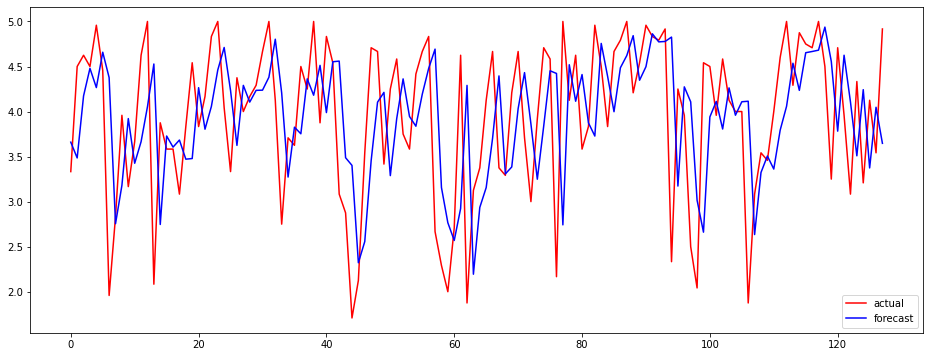

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(testArray_modified,color='red', label='actual')
plt.plot(predictions, color='blue',label='forecast')
plt.legend(loc = 'lower right')
plt.show()

#LSTM

##Train data transform

In [ ]:
df_pd_train=trainDF.toPandas()

In [ ]:
df_pd_train.set_index('RECORD_DATE', inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_pd_train.head(len(df_pd_train))

,avg(CO),avg(NO),avg(NO2),avg(O3),avg(SO2),avg(PM2_5),avg(PM10),avg(NH3),avg(AIR_QUALITY)
RECORD_DATE,,,,,,,,,
2020-11-25,2942.251304,45.997826,56.147391,30.653043,61.325652,111.039130,144.696087,16.632609,4.8261
2020-11-26,2786.834583,40.346250,66.802917,18.816250,62.038333,119.325000,153.500417,18.692917,4.7500
2020-11-27,4193.186667,69.765000,76.099167,19.920417,80.913333,166.900000,209.419167,30.030417,4.5833
2020-11-28,1267.275000,12.223333,49.239583,23.150833,44.191250,48.551250,57.740833,8.580833,3.9167
2020-11-29,1092.593333,10.367917,25.712500,11.967500,25.213333,42.538750,50.347083,6.362500,4.1667
2020-11-30,2700.049583,59.615417,52.381250,3.280000,61.521667,115.283750,133.611667,13.724167,4.6667
2020-12-01,2636.353333,62.432917,47.140000,8.552917,59.963333,117.842500,139.582917,12.883333,4.8333
2020-12-02,1882.275417,32.000000,57.520833,28.683333,65.586250,78.507083,100.393333,13.255000,4.0833
2020-12-03,843.088750,3.745000,38.344583,54.389583,40.560417,34.762500,46.525000,10.250000,3.8750


In [ ]:
df_pd_train = df_pd_train.astype(float)

In [ ]:
n_features = len(df_pd_train.columns)
val_ratio = 0.1
n_epochs = 300
batch_size = 512


###1 week 

In [ ]:
data = df_pd_train.values

In [ ]:
sequence_length_1week = 7
train_1week = []

In [ ]:
for index in range(len(data) - sequence_length_1week):
    train_1week.append(data[index: index + sequence_length_1week])
train_1week = np.array(train_1week)

In [ ]:
train_1week.shape

(454, 7, 9)

In [ ]:
train_samples_1week, train_nx_1week, train_ny_1week = train_1week.shape
train_1week = train_1week.reshape((train_samples_1week, train_nx_1week * train_ny_1week))

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [ ]:
preprocessor = MinMaxScaler().fit(train_1week)
train_1week = preprocessor.transform(train_1week)

In [ ]:
train_1week = train_1week.reshape((train_samples_1week, train_nx_1week, train_ny_1week))

X_train_1week = train_1week[:, : -1]
y_train_1week = train_1week[:, -1][:, -1]

X_train_1week = np.reshape(X_train_1week, (X_train_1week.shape[0], X_train_1week.shape[1], n_features))

In [ ]:
X_train_1week.shape

(454, 6, 9)

###2 weeks

In [ ]:
data = df_pd_train.values

In [ ]:
sequence_length_2weeks = 14
train_2weeks = []

In [ ]:
for index in range(len(data) - sequence_length_2weeks):
    train_2weeks.append(data[index: index + sequence_length_2weeks])
train_2weeks = np.array(train_2weeks)

In [ ]:
train_2weeks.shape

(447, 14, 9)

In [ ]:
train_samples_2weeks, train_nx_2weeks, train_ny_2weeks = train_2weeks.shape
train_2weeks = train_2weeks.reshape((train_samples_2weeks, train_nx_2weeks * train_ny_2weeks))

In [ ]:
preprocessor = MinMaxScaler().fit(train_2weeks)
train_2weeks = preprocessor.transform(train_2weeks)


In [ ]:
train_2weeks = train_2weeks.reshape((train_samples_2weeks, train_nx_2weeks, train_ny_2weeks))

X_train_2weeks = train_2weeks[:, : -1]
y_train_2weeks = train_2weeks[:, -1][:, -1]

X_train_2weeks = np.reshape(X_train_2weeks, (X_train_2weeks.shape[0], X_train_2weeks.shape[1], n_features))

###3 weeks

In [ ]:
sequence_length_3weeks = 21
train_3weeks = []

In [ ]:
for index in range(len(data) - sequence_length_3weeks):
    train_3weeks.append(data[index: index + sequence_length_3weeks])
train_3weeks = np.array(train_3weeks)

In [ ]:
train_3weeks.shape

(440, 21, 9)

In [ ]:
train_samples_3weeks, train_nx_3weeks, train_ny_3weeks = train_3weeks.shape
train_3weeks = train_3weeks.reshape((train_samples_3weeks, train_nx_3weeks * train_ny_3weeks))

In [ ]:
preprocessor = MinMaxScaler().fit(train_3weeks)
train_3weeks = preprocessor.transform(train_3weeks)

In [ ]:
train_3weeks = train_3weeks.reshape((train_samples_3weeks, train_nx_3weeks, train_ny_3weeks))

X_train_3weeks = train_3weeks[:, : -1]
y_train_3weeks = train_3weeks[:, -1][:, -1]

X_train_3weeks = np.reshape(X_train_3weeks, (X_train_3weeks.shape[0], X_train_3weeks.shape[1], n_features))

###1 month

In [ ]:
sequence_length_1month = 28
train_1month = []

In [ ]:
for index in range(len(data) - sequence_length_1month):
    train_1month.append(data[index: index + sequence_length_1month])
train_1month = np.array(train_1month)

In [ ]:
train_samples_1month, train_nx_1month, train_ny_1month = train_1month.shape
train_1month = train_1month.reshape((train_samples_1month, train_nx_1month * train_ny_1month))

In [ ]:
preprocessor = MinMaxScaler().fit(train_1month)
train_1month = preprocessor.transform(train_1month)

In [ ]:
train_1month = train_1month.reshape((train_samples_1month, train_nx_1month, train_ny_1month))

X_train_1month = train_1month[:, : -1]
y_train_1month = train_1month[:, -1][:, -1]

X_train_1month = np.reshape(X_train_1month, (X_train_1month.shape[0], X_train_1month.shape[1], n_features))

##Test data transform

In [ ]:
df_pd_test=testDF.toPandas()

In [ ]:
df_pd_test.set_index('RECORD_DATE', inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_pd_test.head(len(df_pd_test))

,avg(CO),avg(NO),avg(NO2),avg(O3),avg(SO2),avg(PM2_5),avg(PM10),avg(NH3),avg(AIR_QUALITY)
RECORD_DATE,,,,,,,,,
2022-04-17,814.993750,6.039583,32.600833,33.451667,36.230417,27.162500,37.415417,6.160833,3.3333
2022-06-13,2149.858750,41.790000,35.892917,1.856667,51.805417,101.545000,123.456250,13.218750,4.5000
2022-06-14,1682.003750,35.832083,30.145833,8.798333,48.041250,74.562083,92.915417,13.112917,4.6250
2022-04-06,1802.445000,5.400833,60.777500,42.325417,51.339583,110.420417,127.180833,11.495000,4.5000
2022-04-13,1330.413750,17.754167,44.833333,55.160833,56.307083,73.248750,88.483750,10.652083,4.9583
2022-04-16,2629.121250,50.342917,38.842500,17.717917,50.425000,117.812083,135.183750,12.663750,4.4583
2022-03-16,596.641667,6.981667,30.045417,11.512500,34.162917,14.805417,24.597500,5.841667,1.9583
2022-03-07,710.686667,10.383333,32.446250,27.390417,43.263750,23.776250,35.446250,7.675417,2.8333
2022-03-10,967.700000,4.296250,45.468333,68.225417,50.455000,46.082917,68.515000,10.152500,3.9583


In [ ]:
df_pd_test = df_pd_test.astype(float)

###1 week 

In [ ]:
data_test = df_pd_test.values

In [ ]:
sequence_length_1week = 7
test_1week = []

In [ ]:
for index in range(len(data_test) - sequence_length_1week):
    test_1week.append(data_test[index: index + sequence_length_1week])
test_1week = np.array(test_1week)

In [ ]:
test_1week.shape

(121, 7, 9)

In [ ]:
test_samples_1week, test_nx_1week, test_ny_1week = test_1week.shape
test_1week = test_1week.reshape((test_samples_1week, test_nx_1week * test_ny_1week))

In [ ]:
preprocessor = MinMaxScaler().fit(test_1week)
test_1week = preprocessor.transform(test_1week)

In [ ]:
test_1week = test_1week.reshape((test_samples_1week, test_nx_1week, test_ny_1week))

X_test_1week = test_1week[:, : -1]
y_test_1week = test_1week[:, -1][:, -1]

X_test_1week = np.reshape(X_test_1week, (X_test_1week.shape[0], X_test_1week.shape[1], n_features))

In [ ]:
X_test_1week.shape

(121, 6, 9)

###2 weeks

In [ ]:
sequence_length_2weeks = 14
test_2weeks = []

In [ ]:
for index in range(len(data_test) - sequence_length_2weeks):
    test_2weeks.append(data_test[index: index + sequence_length_2weeks])
test_2weeks = np.array(test_2weeks)

In [ ]:
test_2weeks.shape

(114, 14, 9)

In [ ]:
test_samples_2weeks, test_nx_2weeks, test_ny_2weeks = test_2weeks.shape
test_2weeks = test_2weeks.reshape((test_samples_2weeks, test_nx_2weeks * test_ny_2weeks))

In [ ]:
preprocessor = MinMaxScaler().fit(test_2weeks)
test_2weeks = preprocessor.transform(test_2weeks)


In [ ]:
test_2weeks = test_2weeks.reshape((test_samples_2weeks, test_nx_2weeks, test_ny_2weeks))

X_test_2weeks = test_2weeks[:, : -1]
y_test_2weeks = test_2weeks[:, -1][:, -1]

X_test_2weeks = np.reshape(X_test_2weeks, (X_test_2weeks.shape[0], X_test_2weeks.shape[1], n_features))

###3 weeks

In [ ]:
sequence_length_3weeks = 21
test_3weeks = []

In [ ]:
for index in range(len(data_test) - sequence_length_3weeks):
    test_3weeks.append(data_test[index: index + sequence_length_3weeks])
test_3weeks = np.array(test_3weeks)

In [ ]:
test_3weeks.shape

(107, 21, 9)

In [ ]:
test_samples_3weeks, test_nx_3weeks, test_ny_3weeks = test_3weeks.shape
test_3weeks = test_3weeks.reshape((test_samples_3weeks, test_nx_3weeks * test_ny_3weeks))

In [ ]:
preprocessor = MinMaxScaler().fit(test_3weeks)
test_3weeks = preprocessor.transform(test_3weeks)

In [ ]:
test_3weeks = test_3weeks.reshape((test_samples_3weeks, test_nx_3weeks, test_ny_3weeks))

X_test_3weeks = test_3weeks[:, : -1]
y_test_3weeks = test_3weeks[:, -1][:, -1]

X_test_3weeks = np.reshape(X_test_3weeks, (X_test_3weeks.shape[0], X_test_3weeks.shape[1], n_features))

###1 month

In [ ]:
sequence_length_1month = 28
test_1month = []

In [ ]:
for index in range(len(data) - sequence_length_1month):
    test_1month.append(data[index: index + sequence_length_1month])
test_1month = np.array(test_1month)

In [ ]:
test_samples_1month, test_nx_1month, test_ny_1month = test_1month.shape
test_1month = test_1month.reshape((test_samples_1month, test_nx_1month * test_ny_1month))

In [ ]:
preprocessor = MinMaxScaler().fit(test_1month)
test_1month = preprocessor.transform(test_1month)

In [ ]:
test_1month = test_1month.reshape((test_samples_1month, test_nx_1month, test_ny_1month))

X_test_1month = test_1month[:, : -1]
y_test_1month = test_1month[:, -1][:, -1]

X_test_1month = np.reshape(X_test_1month, (X_test_1month.shape[0], X_test_1month.shape[1], n_features))

##Train model

###1 week

In [ ]:
model_1week = Sequential()
model_1week.add(LSTM(70, return_sequences=True,activation='relu', input_shape=(X_train_1week.shape[1],X_train_1week.shape[2])))
model_1week.add(LSTM(70, return_sequences=False,activation='relu'))
model_1week.add(Dense(1))
model_1week.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_1week = model_1week.fit(
    X_train_1week,
    y_train_1week,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2)

Epoch 1/300
1/1 - 3s - loss: 0.5585 - 3s/epoch - 3s/step
Epoch 2/300
1/1 - 0s - loss: 0.5381 - 51ms/epoch - 51ms/step
Epoch 3/300
1/1 - 0s - loss: 0.5171 - 51ms/epoch - 51ms/step
Epoch 4/300
1/1 - 0s - loss: 0.4950 - 48ms/epoch - 48ms/step
Epoch 5/300
1/1 - 0s - loss: 0.4718 - 49ms/epoch - 49ms/step
Epoch 6/300
1/1 - 0s - loss: 0.4474 - 49ms/epoch - 49ms/step
Epoch 7/300
1/1 - 0s - loss: 0.4216 - 47ms/epoch - 47ms/step
Epoch 8/300
1/1 - 0s - loss: 0.3941 - 52ms/epoch - 52ms/step
Epoch 9/300
1/1 - 0s - loss: 0.3646 - 48ms/epoch - 48ms/step
Epoch 10/300
1/1 - 0s - loss: 0.3326 - 49ms/epoch - 49ms/step
Epoch 11/300
1/1 - 0s - loss: 0.2982 - 49ms/epoch - 49ms/step
Epoch 12/300
1/1 - 0s - loss: 0.2614 - 48ms/epoch - 48ms/step
Epoch 13/300
1/1 - 0s - loss: 0.2226 - 48ms/epoch - 48ms/step
Epoch 14/300
1/1 - 0s - loss: 0.1827 - 48ms/epoch - 48ms/step
Epoch 15/300
1/1 - 0s - loss: 0.1434 - 46ms/epoch - 46ms/step
Epoch 16/300
1/1 - 0s - loss: 0.1072 - 46ms/epoch - 46ms/step
Epoch 17/300
1/1 - 0s

In [ ]:
#model_1week.save('/content/drive/MyDrive/nam_3/big data/LSTM_model/1week')

###2 weeks

In [ ]:
model_2weeks = Sequential()
model_2weeks.add(LSTM(70, return_sequences=True,activation='relu', input_shape=(X_train_2weeks.shape[1],X_train_2weeks.shape[2])))
model_2weeks.add(LSTM(70, return_sequences=False,activation='relu'))
model_2weeks.add(Dense(1))
model_2weeks.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_2weeks = model_2weeks.fit(
    X_train_2weeks,
    y_train_2weeks,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2)

Epoch 1/300
1/1 - 2s - loss: 0.5700 - 2s/epoch - 2s/step
Epoch 2/300
1/1 - 0s - loss: 0.5185 - 89ms/epoch - 89ms/step
Epoch 3/300
1/1 - 0s - loss: 0.4720 - 96ms/epoch - 96ms/step
Epoch 4/300
1/1 - 0s - loss: 0.4290 - 91ms/epoch - 91ms/step
Epoch 5/300
1/1 - 0s - loss: 0.3884 - 92ms/epoch - 92ms/step
Epoch 6/300
1/1 - 0s - loss: 0.3491 - 89ms/epoch - 89ms/step
Epoch 7/300
1/1 - 0s - loss: 0.3090 - 92ms/epoch - 92ms/step
Epoch 8/300
1/1 - 0s - loss: 0.2661 - 87ms/epoch - 87ms/step
Epoch 9/300
1/1 - 0s - loss: 0.2198 - 87ms/epoch - 87ms/step
Epoch 10/300
1/1 - 0s - loss: 0.1713 - 91ms/epoch - 91ms/step
Epoch 11/300
1/1 - 0s - loss: 0.1235 - 106ms/epoch - 106ms/step
Epoch 12/300
1/1 - 0s - loss: 0.0833 - 85ms/epoch - 85ms/step
Epoch 13/300
1/1 - 0s - loss: 0.0645 - 88ms/epoch - 88ms/step
Epoch 14/300
1/1 - 0s - loss: 0.0877 - 87ms/epoch - 87ms/step
Epoch 15/300
1/1 - 0s - loss: 0.1237 - 95ms/epoch - 95ms/step
Epoch 16/300
1/1 - 0s - loss: 0.1253 - 93ms/epoch - 93ms/step
Epoch 17/300
1/1 - 

In [ ]:
#model_2weeks.save('/content/drive/MyDrive/nam_3/big data/LSTM_model/2weeks')

###3 weeks

In [ ]:
model_3weeks = Sequential()
model_3weeks.add(LSTM(70, return_sequences=True,activation='relu', input_shape=(X_train_3weeks.shape[1],X_train_3weeks.shape[2])))
model_3weeks.add(LSTM(70, return_sequences=False,activation='relu'))
model_3weeks.add(Dense(1))
model_3weeks.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_3weeks = model_3weeks.fit(
    X_train_3weeks,
    y_train_3weeks,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2)

Epoch 1/300
1/1 - 2s - loss: 0.6122 - 2s/epoch - 2s/step
Epoch 2/300
1/1 - 0s - loss: 0.5414 - 133ms/epoch - 133ms/step
Epoch 3/300
1/1 - 0s - loss: 0.4731 - 132ms/epoch - 132ms/step
Epoch 4/300
1/1 - 0s - loss: 0.4081 - 145ms/epoch - 145ms/step
Epoch 5/300
1/1 - 0s - loss: 0.3432 - 136ms/epoch - 136ms/step
Epoch 6/300
1/1 - 0s - loss: 0.2792 - 130ms/epoch - 130ms/step
Epoch 7/300
1/1 - 0s - loss: 0.2184 - 133ms/epoch - 133ms/step
Epoch 8/300
1/1 - 0s - loss: 0.1603 - 139ms/epoch - 139ms/step
Epoch 9/300
1/1 - 0s - loss: 0.1064 - 138ms/epoch - 138ms/step
Epoch 10/300
1/1 - 0s - loss: 0.0671 - 135ms/epoch - 135ms/step
Epoch 11/300
1/1 - 0s - loss: 0.0705 - 144ms/epoch - 144ms/step
Epoch 12/300
1/1 - 0s - loss: 0.1202 - 135ms/epoch - 135ms/step
Epoch 13/300
1/1 - 0s - loss: 0.1284 - 131ms/epoch - 131ms/step
Epoch 14/300
1/1 - 0s - loss: 0.1018 - 141ms/epoch - 141ms/step
Epoch 15/300
1/1 - 0s - loss: 0.0748 - 131ms/epoch - 131ms/step
Epoch 16/300
1/1 - 0s - loss: 0.0608 - 131ms/epoch - 13

In [ ]:
#model_3weeks.save('/content/drive/MyDrive/nam_3/big data/LSTM_model/3weeks')

###1 month

In [ ]:
model_1month = Sequential()
model_1month.add(LSTM(70, return_sequences=True,activation='relu', input_shape=(X_train_1month.shape[1],X_train_1month.shape[2])))
model_1month.add(LSTM(70, return_sequences=False,activation='relu'))
model_1month.add(Dense(1))
model_1month.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_1month = model_1month.fit(
    X_train_1month,
    y_train_1month,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2)

Epoch 1/300
1/1 - 2s - loss: 0.5503 - 2s/epoch - 2s/step
Epoch 2/300
1/1 - 0s - loss: 0.4986 - 177ms/epoch - 177ms/step
Epoch 3/300
1/1 - 0s - loss: 0.4493 - 173ms/epoch - 173ms/step
Epoch 4/300
1/1 - 0s - loss: 0.4016 - 178ms/epoch - 178ms/step
Epoch 5/300
1/1 - 0s - loss: 0.3528 - 186ms/epoch - 186ms/step
Epoch 6/300
1/1 - 0s - loss: 0.3021 - 177ms/epoch - 177ms/step
Epoch 7/300
1/1 - 0s - loss: 0.2492 - 169ms/epoch - 169ms/step
Epoch 8/300
1/1 - 0s - loss: 0.1941 - 189ms/epoch - 189ms/step
Epoch 9/300
1/1 - 0s - loss: 0.1384 - 167ms/epoch - 167ms/step
Epoch 10/300
1/1 - 0s - loss: 0.0889 - 176ms/epoch - 176ms/step
Epoch 11/300
1/1 - 0s - loss: 0.0669 - 183ms/epoch - 183ms/step
Epoch 12/300
1/1 - 0s - loss: 0.1106 - 172ms/epoch - 172ms/step
Epoch 13/300
1/1 - 0s - loss: 0.1326 - 193ms/epoch - 193ms/step
Epoch 14/300
1/1 - 0s - loss: 0.1080 - 179ms/epoch - 179ms/step
Epoch 15/300
1/1 - 0s - loss: 0.0795 - 176ms/epoch - 176ms/step
Epoch 16/300
1/1 - 0s - loss: 0.0645 - 173ms/epoch - 17

In [ ]:
#model_1month.save('/content/drive/MyDrive/nam_3/big data/LSTM_model/1month')

##Load model

In [ ]:
#model=models.load_model('/content/drive/MyDrive/nam_3/big data/LSTM_model')

##Evaluate

In [ ]:
predicted_1week = model_1week.predict(X_test_1week)
predicted_2weeks = model_2weeks.predict(X_test_2weeks)
predicted_3weeks = model_3weeks.predict(X_test_3weeks)
predicted_1month = model_1month.predict(X_test_1month)

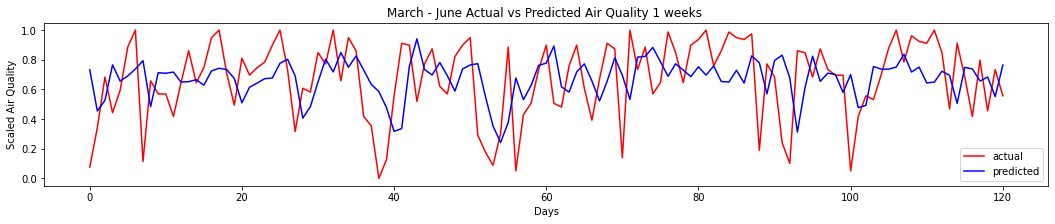

In [ ]:
plt.figure(figsize=(18,3))

plt.plot(y_test_1week,color='red', label='actual')
plt.plot(predicted_1week,color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('March - June Actual vs Predicted Air Quality 1 weeks ')
plt.xlabel('Days')
plt.ylabel('Scaled Air Quality')
plt.savefig('predict_1week.png')

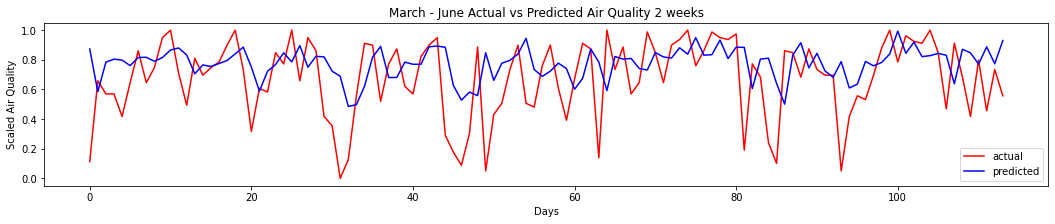

In [ ]:
plt.figure(figsize=(18,3))
plt.plot(y_test_2weeks,color='red', label='actual')
plt.plot(predicted_2weeks,color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('March - June Actual vs Predicted Air Quality 2 weeks')
plt.xlabel('Days')
plt.ylabel('Scaled Air Quality')
plt.savefig('predict_2weeks.png')

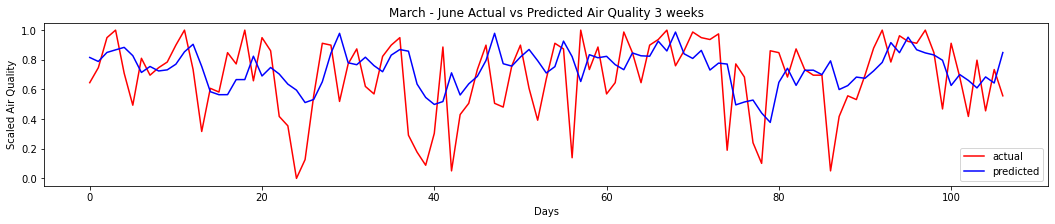

In [ ]:
plt.figure(figsize=(18,3))
plt.plot(y_test_3weeks,color='red', label='actual')
plt.plot(predicted_3weeks,color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('March - June Actual vs Predicted Air Quality 3 weeks')
plt.xlabel('Days')
plt.ylabel('Scaled Air Quality')
plt.savefig('predict_3weeks.png')

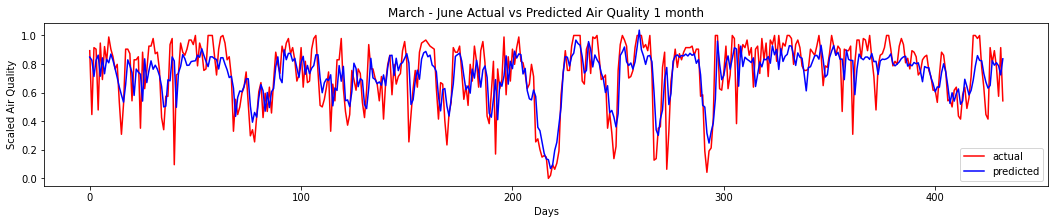

In [ ]:
plt.figure(figsize=(18,3))
plt.plot(y_test_1month,color='red', label='actual')
plt.plot(predicted_1month,color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('March - June Actual vs Predicted Air Quality 1 month')
plt.xlabel('Days')
plt.ylabel('Scaled Air Quality')
plt.savefig('predict_1month.png')